In [1]:
# some imports
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../modules")
import pandas as pd
import cufflinks as cf
import plotly.express as px
import re
cf.go_offline()

In [2]:
# read dataset

diamonds = pd.read_csv('../data/diamonds_train.csv', sep=',')

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
carat      40455 non-null float64
cut        40455 non-null object
color      40455 non-null object
clarity    40455 non-null object
depth      40455 non-null float64
table      40455 non-null float64
price      40455 non-null int64
x          40455 non-null float64
y          40455 non-null float64
z          40455 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [3]:
def Volume(x, y, z):
    volume = x * y * z
    return volume
        
diamonds['Volume'] = diamonds.apply(lambda x: Volume(x['x'], x['y'],x['z']), axis=1 )       

In [4]:
def Density(carat,volume):
    if volume == 0:
        density = "Na"
    else:
        density = carat / volume * 100
    return density
        
diamonds['Density'] = diamonds.apply(lambda x: Density(x['carat'], x['Volume']), axis=1 )    

In [5]:
diamonds[:20]

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume,Density
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.096725,0.613912
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.395750,0.610737
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.436890,0.625899
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.268800,0.618692
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.429975,0.605593
5,1.52,Ideal,F,SI2,61.2,57.0,9057,7.45,7.39,4.54,249.951970,0.608117
6,1.01,Fair,H,VS2,65.2,56.0,3733,6.23,6.19,4.05,156.182985,0.646677
7,1.52,Ideal,J,VS1,62.3,58.0,8608,7.32,7.35,4.57,245.875140,0.6182
8,0.31,Ideal,H,VS1,61.8,54.2,557,4.33,4.37,2.69,50.900449,0.609032
9,1.14,Ideal,G,SI1,61.7,56.0,6741,6.71,6.75,4.15,187.963875,0.6065


In [6]:
diamonds.mean()

carat        0.797706
depth       61.752841
table       57.446133
price     3928.444469
x            5.729392
y            5.732819
z            3.537154
Volume     129.802259
dtype: float64

In [7]:
diamonds.std()

carat        0.475544
depth        1.431725
table        2.233535
price     3992.416147
x            1.124453
y            1.146650
z            0.697062
Volume      78.903997
dtype: float64

In [8]:
# Let's check the top 10 most valuable diamonds:

diamonds.sort_values(by=['price'], ascending=False)[:10]

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume,Density
7034,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,371.494200,0.61643
3990,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,317.333520,0.630252
29107,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,249.029352,0.606354
25529,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24,377.248560,0.607027
618,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91,320.144766,0.624717
6912,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84,335.429424,0.608176
11427,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70,267.909870,0.638274
34658,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21,360.644015,0.596156
13839,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.00,0.000000,Na
31694,2.05,Ideal,G,SI1,61.9,57.0,18787,8.10,8.16,5.03,332.462880,0.61661


In [9]:
diamonds.to_csv('../data/diamonds_train_mod.csv')

In [10]:
carat_prices = diamonds[['carat','price']].groupby('carat').agg('mean')
carat_prices.head()


,price
carat,
0.20,363.333333
0.21,380.222222
0.22,391.400000
0.23,487.261682
0.24,506.778378


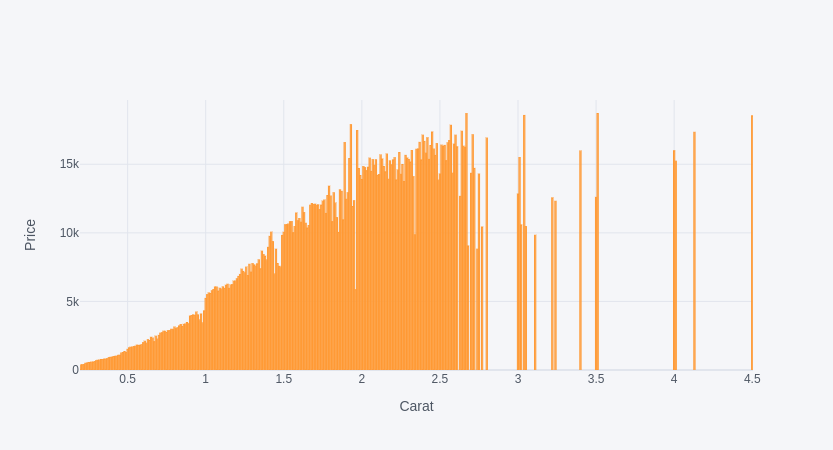

In [11]:
carat_prices.iplot(kind='bar',
                xTitle ='Carat',
                yTitle='Price')

In [12]:
cut_prices = diamonds[['cut','price']].groupby('cut').agg('mean')
cut_prices = cut_prices.reindex(['Fair','Good','Very Good','Premium','Ideal'])
cut_prices

,price
cut,
Fair,4333.271980
Good,3880.611794
Very Good,3994.444420
Premium,4617.322612
Ideal,3436.112577


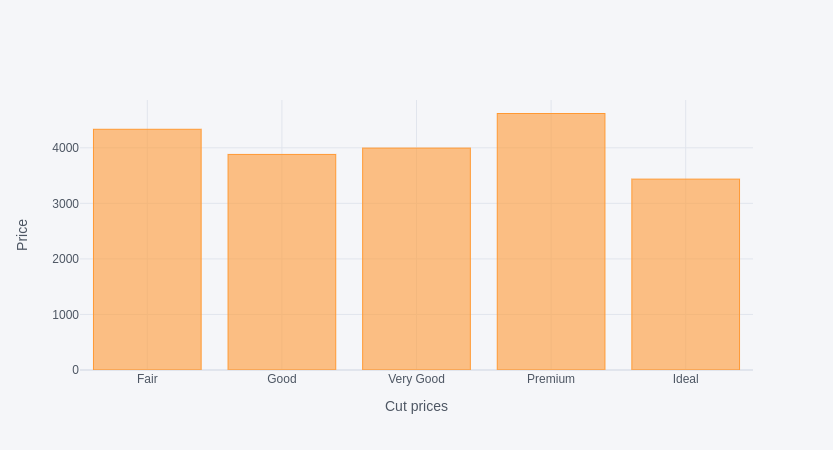

In [13]:
cut_prices.iplot(kind='bar',
                xTitle ='Cut prices',
                yTitle='Price')

In [14]:
color_prices = diamonds[['color','price']].groupby('color').agg('mean')
color_prices

,price
color,
D,3134.943157
E,3088.342526
F,3677.355720
G,4023.214902
H,4476.469014
I,5090.868800
J,5346.234112


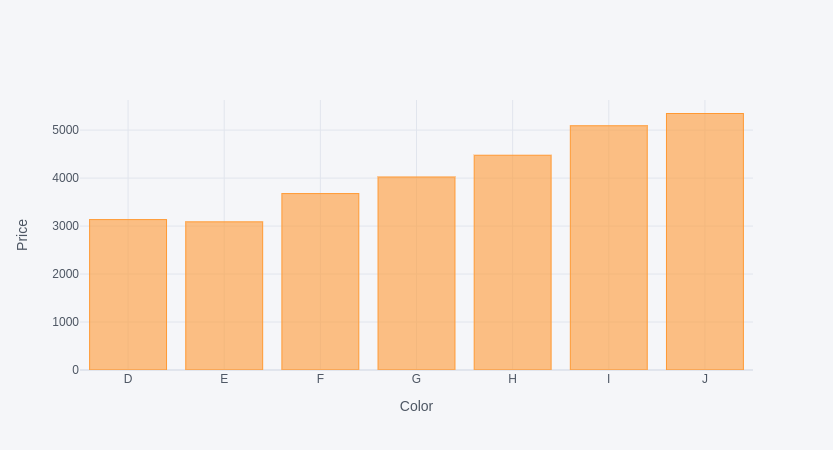

In [15]:
color_prices.iplot(kind='bar',
                xTitle ='Color',
                yTitle='Price')

In [19]:
clarity_prices = diamonds[['clarity','price']].groupby('clarity').agg('mean')
clarity_prices = clarity_prices.reindex(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
clarity_prices

,price
clarity,
I1,3971.206039
SI2,5101.044307
SI1,3999.856908
VS2,3913.590182
VS1,3796.813551
VVS2,3240.978942
VVS1,2559.498558
IF,2797.897513


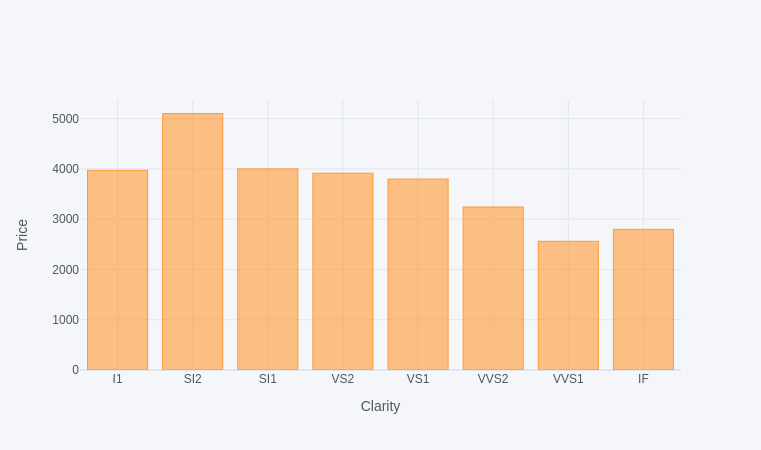

In [20]:
clarity_prices.iplot(kind='bar',
                xTitle ='Clarity',
                yTitle='Price')